In [1]:
%pip install robin_stocks matplotlib yfinance
import os
import robin_stocks.robinhood as r
import matplotlib.pyplot as plt
import yfinance as yf
username = os.getenv("ROBINHOOD_USERNAME")
password = os.getenv("ROBINHOOD_PASSWORD")
login = r.login(username,password)


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
my_stocks = r.build_holdings()
for key,value in my_stocks.items():
    print(key,value)

GEVO {'price': '0.744600', 'quantity': '151.00000000', 'average_buy_price': '4.0428', 'equity': '112.43', 'percent_change': '-81.58', 'intraday_percent_change': '0.00', 'equity_change': '-498.028200', 'type': 'stock', 'name': 'Gevo', 'id': '2e153a47-7b8a-4ebc-a37b-a3848288166b', 'pe_ratio': '-2.550000', 'percentage': '3.71'}
AAPL {'price': '226.970000', 'quantity': '1.01220100', 'average_buy_price': '170.2922', 'equity': '229.74', 'percent_change': '33.28', 'intraday_percent_change': '0.00', 'equity_change': '57.369326', 'type': 'stock', 'name': 'Apple', 'id': '450dfc6d-5510-4d40-abfb-f633b7d9be3e', 'pe_ratio': '34.393000', 'percentage': '7.58'}
RIVN {'price': '13.340000', 'quantity': '1.00000000', 'average_buy_price': '81.1900', 'equity': '13.34', 'percent_change': '-83.57', 'intraday_percent_change': '0.00', 'equity_change': '-67.850000', 'type': 'stock', 'name': 'Rivian Automotive', 'id': 'acc0099d-bae4-4589-936c-e36c5c5321ed', 'pe_ratio': '-2.270000', 'percentage': '0.44'}
UAL {'pr

In [3]:
def get_price(symbol):
    stock_data = r.stocks.get_latest_price(symbol)
    return float(stock_data[0])
get_price("NVDA")

128.2299

[*********************100%%**********************]  1 of 1 completed


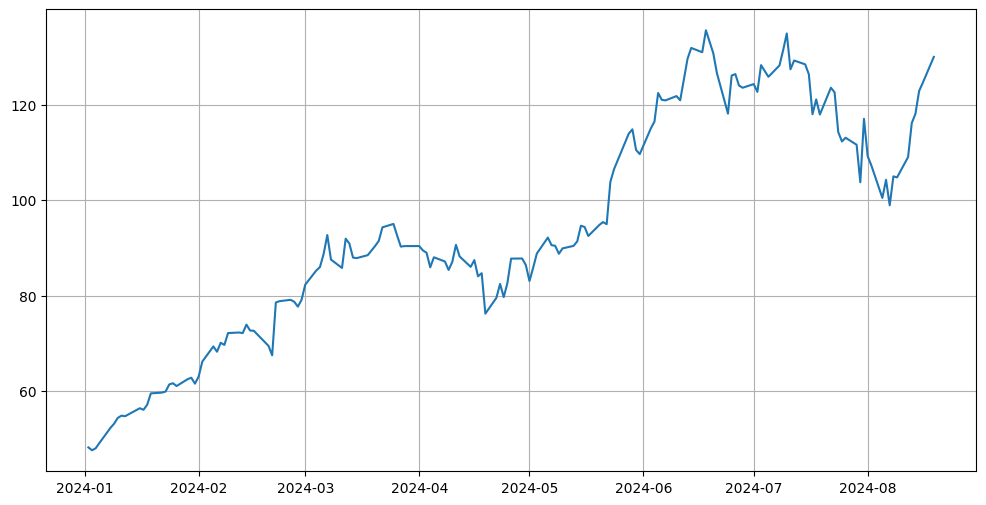

In [16]:
nvidia_data = yf.download("NVDA", period="ytd")
plt.figure(figsize=(12, 6))
plt.plot(nvidia_data['Close'])
plt.grid(True)
plt.show()